<a href="https://colab.research.google.com/github/pawel0508/First_repository/blob/master/%C4%86wiczenia_11_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'1.18.5'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [99]:
google = fetch_financial_data(company='GOOGL')

### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [100]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-08-21 to 2015-08-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [101]:
pd.set_option('precision', 2)

google.describe()


,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,1032.74,1042.33,1022.93,1033.15,1770207.39
std,228.45,231.53,226.08,229.10,866833.92
min,625.50,634.50,617.84,622.61,521141.00
25%,808.01,813.49,804.06,808.49,1216028.00
50%,1053.89,1065.00,1041.22,1052.90,1551325.00
75%,1189.69,1200.20,1176.25,1190.13,2037263.00
max,1585.03,1591.88,1562.31,1576.25,6658855.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [102]:
pd.set_option('precision', 2)

google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,1032.74,1042.33,1022.93,1033.15,1770207.39
std,228.45,231.53,226.08,229.10,866833.92
min,625.50,634.50,617.84,622.61,521141.00
25%,808.01,813.49,804.06,808.49,1216028.00
50%,1053.89,1065.00,1041.22,1052.90,1551325.00
75%,1189.69,1200.20,1176.25,1190.13,2037263.00
max,1585.03,1591.88,1562.31,1576.25,6658855.00


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [103]:
pd.options.display.float_format = '{:.2f}'.format # tłumimy notację wykładniczą 
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,1032.74,1042.33,1022.93,1033.15,1770207.39
std,228.45,231.53,226.08,229.10,866833.92
min,625.50,634.50,617.84,622.61,521141.00
25%,808.01,813.49,804.06,808.49,1216028.00
50%,1053.89,1065.00,1041.22,1052.90,1551325.00
75%,1189.69,1200.20,1176.25,1190.13,2037263.00
max,1585.03,1591.88,1562.31,1576.25,6658855.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

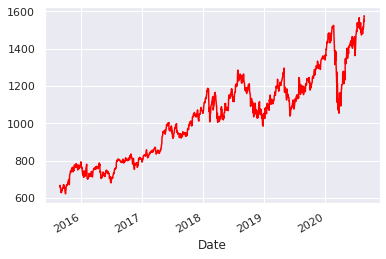

In [104]:
google.Close.plot(c = 'red')

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [105]:
google = google.reset_index()


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [106]:
google['Month'] = pd.DatetimeIndex(google['Date']).month
google['Year'] = pd.DatetimeIndex(google['Date']).year
google


,Date,Open,High,Low,Close,Volume,Month,Year
0,2020-08-21,1571.80,1591.88,1562.31,1575.57,1742275,8,2020
1,2020-08-20,1539.97,1580.17,1534.46,1576.25,1319131,8,2020
2,2020-08-19,1552.49,1568.86,1540.00,1544.61,1523592,8,2020
3,2020-08-18,1526.12,1557.37,1521.66,1555.78,1418850,8,2020
4,2020-08-17,1515.97,1523.78,1505.00,1516.24,999934,8,2020
...,...,...,...,...,...,...,...,...
1252,2015-09-01,633.81,644.44,625.06,629.56,2572800,9,2015
1253,2015-08-31,654.34,664.41,646.35,647.82,1946800,8,2015
1254,2015-08-28,665.76,667.00,653.75,659.69,1941800,8,2015
1255,2015-08-27,671.99,673.98,651.10,667.96,2948700,8,2015


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [107]:
google.groupby('Year').mean()['Close']

Year
2015    714.70
2016    763.21
2017    939.77
2018   1122.05
2019   1191.22
2020   1389.08
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

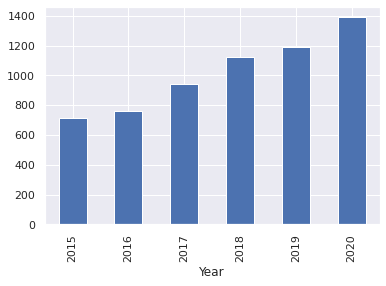

In [108]:
google.groupby('Year').mean()['Close'].plot(kind = 'bar')

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [109]:
google.groupby('Month').mean()['Close']

Month
1    1052.83
2    1044.11
3    1008.99
4    1027.07
5    1057.08
6    1070.44
7    1123.99
8    1089.74
9     953.44
10    976.73
11    991.32
12    999.30
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

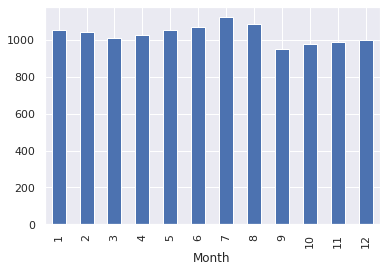

In [110]:
google.groupby('Month').mean()['Close'].plot(kind = 'bar')

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [111]:
google.groupby(['Year', 'Month']).mean()['Close']

Year  Month
2015  8        658.80
      9        647.79
      10       691.56
      11       759.64
      12       771.04
                ...  
2020  4       1230.11
      5       1381.37
      6       1431.60
      7       1515.32
      8       1514.19
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [112]:
google.Close.argmax()

1

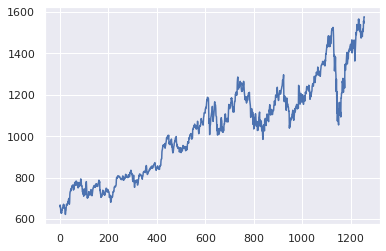

In [113]:
df = google.iloc[::-1]
df.index = df.index[::-1]
df.Close.plot()

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [114]:
google.loc[google.Close == max(google.Close)]

,Date,Open,High,Low,Close,Volume,Month,Year
1,2020-08-20,1539.97,1580.17,1534.46,1576.25,1319131,8,2020


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [115]:
google[['Date', 'Open', 'Close', 'Volume']] # w takim wypadku trzeba liste zagnieździć

,Date,Open,Close,Volume
0,2020-08-21,1571.80,1575.57,1742275
1,2020-08-20,1539.97,1576.25,1319131
2,2020-08-19,1552.49,1544.61,1523592
3,2020-08-18,1526.12,1555.78,1418850
4,2020-08-17,1515.97,1516.24,999934
...,...,...,...,...
1252,2015-09-01,633.81,629.56,2572800
1253,2015-08-31,654.34,647.82,1946800
1254,2015-08-28,665.76,659.69,1941800
1255,2015-08-27,671.99,667.96,2948700


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [116]:
google = google.set_index('Date')


In [117]:
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2020-08-21,1571.80,1591.88,1562.31,1575.57,1742275,8,2020
2020-08-20,1539.97,1580.17,1534.46,1576.25,1319131,8,2020
2020-08-19,1552.49,1568.86,1540.00,1544.61,1523592,8,2020
2020-08-18,1526.12,1557.37,1521.66,1555.78,1418850,8,2020
2020-08-17,1515.97,1523.78,1505.00,1516.24,999934,8,2020
...,...,...,...,...,...,...,...
2015-09-01,633.81,644.44,625.06,629.56,2572800,9,2015
2015-08-31,654.34,664.41,646.35,647.82,1946800,8,2015
2015-08-28,665.76,667.00,653.75,659.69,1941800,8,2015


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [118]:
del google['Year']
del google['Month']
google

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-21,1571.80,1591.88,1562.31,1575.57,1742275
2020-08-20,1539.97,1580.17,1534.46,1576.25,1319131
2020-08-19,1552.49,1568.86,1540.00,1544.61,1523592
2020-08-18,1526.12,1557.37,1521.66,1555.78,1418850
2020-08-17,1515.97,1523.78,1505.00,1516.24,999934
...,...,...,...,...,...
2015-09-01,633.81,644.44,625.06,629.56,2572800
2015-08-31,654.34,664.41,646.35,647.82,1946800
2015-08-28,665.76,667.00,653.75,659.69,1941800


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [119]:
google.columns = ['Otwarice', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarice,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2020-08-21,1571.80,1591.88,1562.31,1575.57,1742275
2020-08-20,1539.97,1580.17,1534.46,1576.25,1319131
2020-08-19,1552.49,1568.86,1540.00,1544.61,1523592
2020-08-18,1526.12,1557.37,1521.66,1555.78,1418850
2020-08-17,1515.97,1523.78,1505.00,1516.24,999934
...,...,...,...,...,...
2015-09-01,633.81,644.44,625.06,629.56,2572800
2015-08-31,654.34,664.41,646.35,647.82,1946800
2015-08-28,665.76,667.00,653.75,659.69,1941800


In [121]:
google[['Zamkniecie', 'Wolumen']].corr()

,Zamkniecie,Wolumen
Zamkniecie,1.00,0.03
Wolumen,0.03,1.00
